In [30]:
# Imports
%matplotlib inline
import quandl
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from collections import defaultdict

In [4]:
# Get price data from Quandl
bitcoin = quandl.get("BCHAIN/MKPRU")
bitcoin = bitcoin.shift(-1) # data set has daily open, we want daily close
bitcoin = bitcoin.loc['2011-01-01':] # Remove the 0's
bitcoin.columns = ['Last']

In [31]:
bitcoin['RollingRet'] = (bitcoin['Last'].shift(-365) / bitcoin['Last'] - 1) * 100

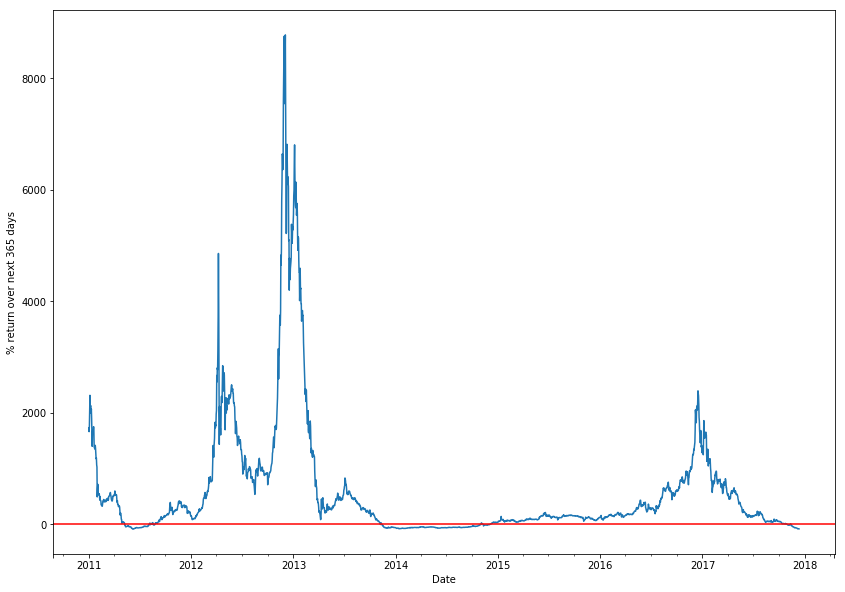

In [104]:
ax = bitcoin.loc['2011':'2018','RollingRet'].plot(figsize=(14,10))
ax.set_ylabel("% return over next 365 days")
plt.axhline(y=0, color='r', linestyle='-');

In [59]:
# Count days each year where return over next 365 days would have been negative  
neg_return = bitcoin[bitcoin['RollingRet'] < 0 ]
neg_return['Last'].groupby(neg_return.index.year).count().to_frame().rename(columns={'Last':'Count'})

,Count
Date,
2011,95
2013,50
2014,329
2017,41


In [101]:
# Get start and end dates and see what was happening with price at those times

print neg_return['2011'].index[0], neg_return.loc['2011','Last'].iloc[0]
print neg_return['2011'].index[-1], neg_return.loc['2011','Last'].iloc[-1]

print neg_return['2013'].index[0], neg_return.loc['2013','Last'].iloc[0]
print neg_return['2014'].index[-1], neg_return.loc['2014','Last'].iloc[-1]

print neg_return['2017'].index[0], neg_return.loc['2013','Last'].iloc[0]

2011-05-09 00:00:00 5.2
2011-08-25 00:00:00 10.3
2013-11-08 00:00:00 359.76
2014-12-03 00:00:00 371.67
2017-10-31 00:00:00 359.76


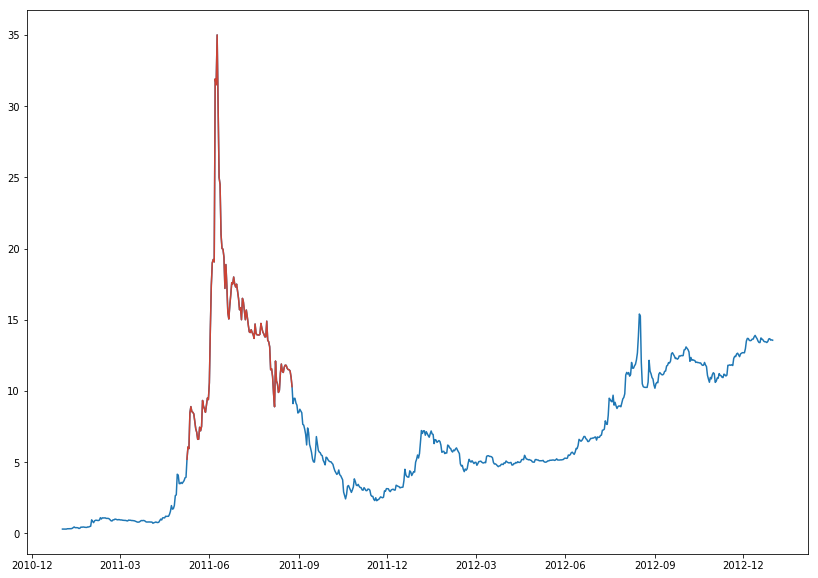

In [99]:
fig, ax = plt.subplots(figsize=(14,10))
ax.plot(bitcoin.loc['2011':'2012','Last'].index, bitcoin.loc['2011':'2012','Last'])       
#ax.plot([neg_return['2011'].index[0],neg_return['2011'].index[-1]], [neg_return.loc['2011','Last'].iloc[0],neg_return.loc['2011','Last'].iloc[-1]], 'x', color='Red', markersize=8)
ax.plot(bitcoin.loc[neg_return['2011'].index[0]:neg_return['2011'].index[-1]].index, bitcoin.loc[neg_return['2011'].index[0]:neg_return['2011'].index[-1],'Last'], color='#CB4335'); 

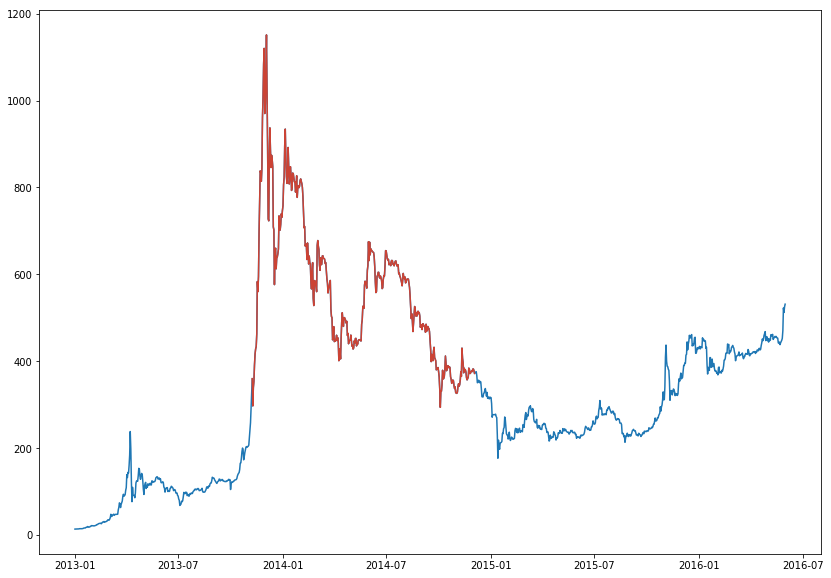

In [100]:
fig, ax = plt.subplots(figsize=(14,10))
ax.plot(bitcoin.loc['2013':'2016-05','Last'].index, bitcoin.loc['2013':'2016-05','Last'])       
#ax.plot([neg_return['2013'].index[0],neg_return['2014'].index[-1]], [neg_return.loc['2013','Last'].iloc[0],neg_return.loc['2014','Last'].iloc[-1]], 'x', color='Red', markersize=8)
ax.plot(bitcoin.loc[neg_return['2013'].index[0]:neg_return['2014'].index[-1]].index, bitcoin.loc[neg_return['2013'].index[0]:neg_return['2014'].index[-1],'Last'], color='#CB4335');  

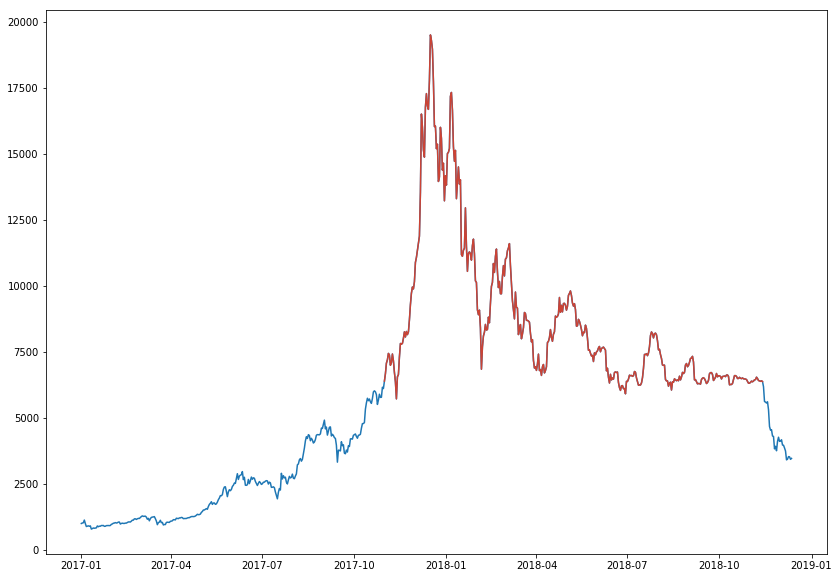

In [102]:
fig, ax = plt.subplots(figsize=(14,10))
ax.plot(bitcoin.loc['2017':'2018','Last'].index, bitcoin.loc['2017':'2018','Last'])       
#ax.plot([neg_return['2013'].index[0],neg_return['2014'].index[-1]], [neg_return.loc['2013','Last'].iloc[0],neg_return.loc['2014','Last'].iloc[-1]], 'x', color='Red', markersize=8)
ax.plot(bitcoin.loc[neg_return['2017'].index[0]:'2018-11-13'].index, bitcoin.loc[neg_return['2017'].index[0]:'2018-11-13','Last'], color='#CB4335'); 